# Fashion Items Classification Research with Tensorflow

## TOD

1. [Set Up](#set-up)
    1. [Libraries](#libraries)
    2. [Data](#data)
2. [EDA](#eda)
3. [Model Training](#model-training)
    1. [TensorFlow](#tensorflow)
4. [Model Evaluation](#model-evaluation)

## Set Up

### Libraries

In [23]:
# Data
from __future__ import absolute_import, division, print_function

# TensorFlow NN
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np

# Data visualization
import matplotlib.pyplot as plt

### Data <a name="1.2"></a>

Training data: (60000, 28, 28); (60000,)
Testing data: (10000, 28, 28); (10000,)
Example label class: 9


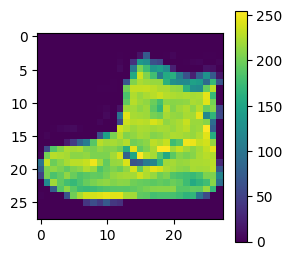

In [2]:
# Import data
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(f'Training data: {x_train.shape}; {y_train.shape}')
print(f'Testing data: {x_test.shape}; {y_test.shape}')

# Data format
print(f'Example label class: {y_train[0]}')
plt.figure(figsize=(3,3))
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

Each sample/image is a 28x28 pixeled vector with values from 0-255. \
\
The label is a value from 0-9 that represents the category, represented by the following list:

In [8]:
# Data classes
classes = {
  0 : 'T-Shirt/top', 
  1 : 'Trouser', 
  2 : 'Pullover', 
  3 : 'Dress', 
  4 : 'Coat', 
  5 : 'Sandal', 
  6 : 'Shirt',
  7 : 'Sneaker', 
  8 : 'Bag', 
  9 : 'Ankle Boot'
}

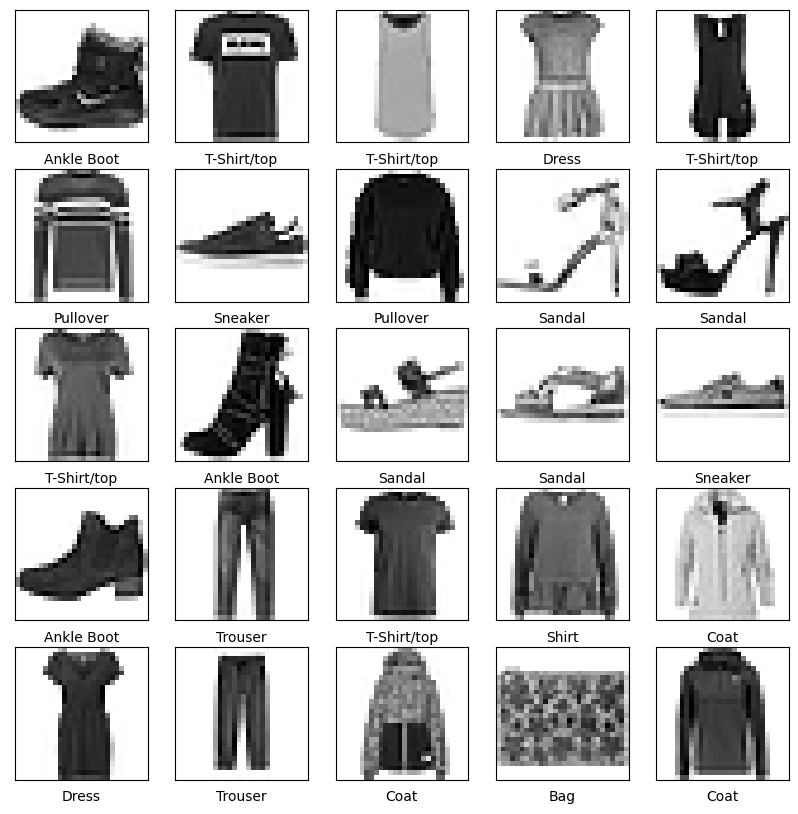

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(classes[y_train[i]])
plt.show()

## EDA

Most models work better when values are in the range 0-1, in this case they are 0-255 so they need to be normalized.

$$ normalized_x = {x - x_min \over x_max - x_min} =  {x - 0 \over 255 - 0} = {x \over 255}$$

In [35]:
# Normalize values
x_train = x_train / 255
x_test = x_test / 255

Example label class: 9


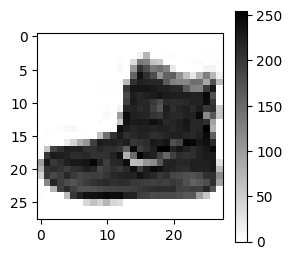

In [44]:
# Data format
print(f'Example label class: {y_train[0]}')
plt.figure(figsize=(3,3))
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

## Model Training

#### Tensorflow

In [13]:
# Create the model
model = keras.Sequential([
  keras.layers.Flatten(input_shape=(28, 28)),       # Converts the multi-dimensional arrays into flattened one-dimensional arrays or single-dimensional arrays
  keras.layers.Dense(128, activation=tf.nn.relu),   # Returns 0 if the input is negative and the same value if the input is positive
  keras.layers.Dense(10, activation=tf.nn.softmax)  # The elements of the output vector are in range (0, 1) and sum to 1
])

# Configure the model for training
model.compile(
  optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.7171 - accuracy: 0.6885
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6724 - accuracy: 0.7646
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5809 - accuracy: 0.7970
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5286 - accuracy: 0.8176
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4926 - accuracy: 0.8309
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4783 - accuracy: 0.8367
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4693 - accuracy: 0.8402
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4630 - accuracy: 0.8424
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4601 - accuracy: 0.8434
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.455

## Model Evaluation

In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 1s 1ms/step - loss: 0.6163 - accuracy: 0.8103
Test accuracy: 0.8102999925613403
Test loss: 0.6163475513458252


313/313 [==============================] - 0s 1ms/step


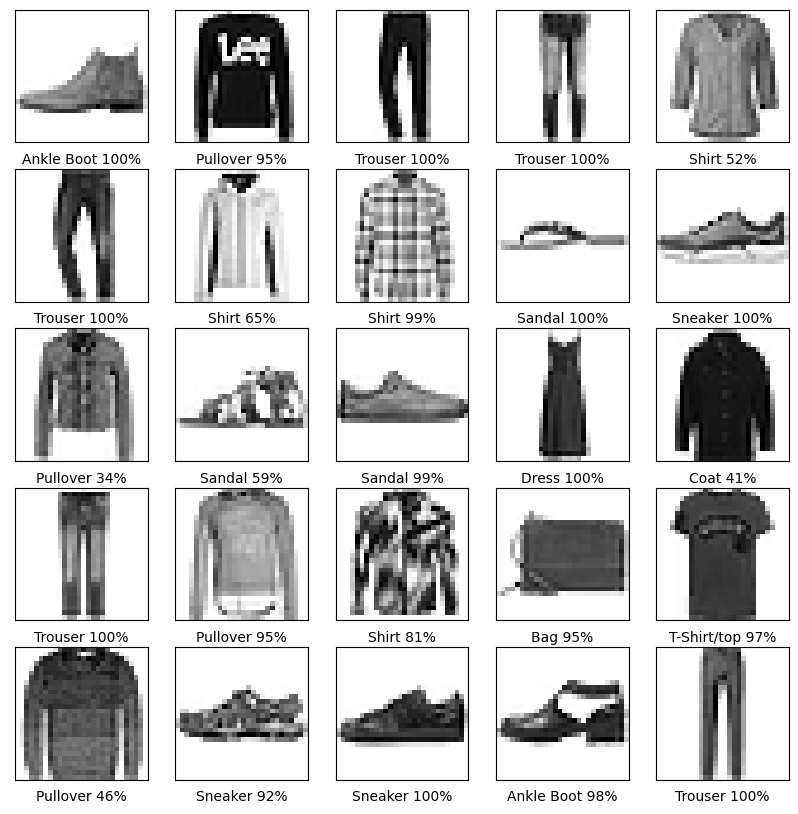

In [15]:
predictions = model.predict(x_test)

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i], cmap=plt.cm.binary)
  plt.xlabel(f'{classes[np.argmax(predictions[i])]} {round(predictions[i].max()*100)}%')
plt.show()